# Cifar-10 : reconnaissance d'images

1. l’architecture du réseau utilisé est composée de plusieurs couches de convolution
2. pour diminuer le nombre de poids à calculer, on intercale des couches de pooling (regroupement de termes)
3. ces pooling sont des max-pooling de taille 2 × 2
4. de tels regroupements divisent par 4 la taille des données en conservant les
principales caractéristiques, ce qui fait que la couche de neurones suivante possèdera 4 fois moins de poids à calculer

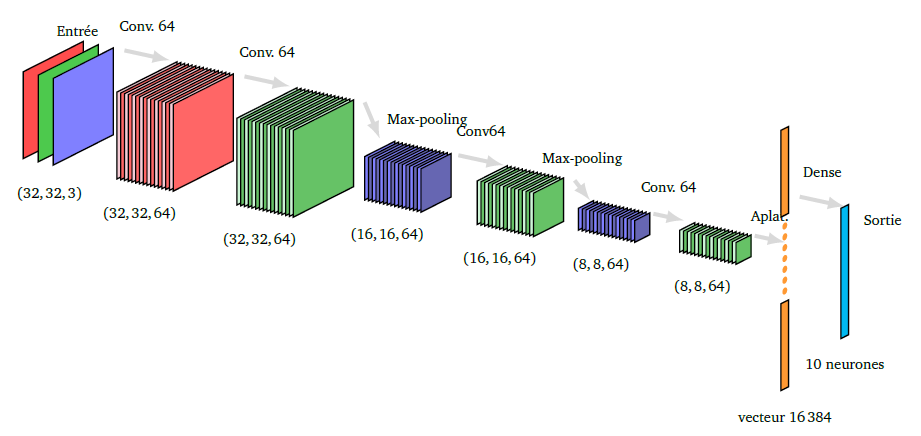

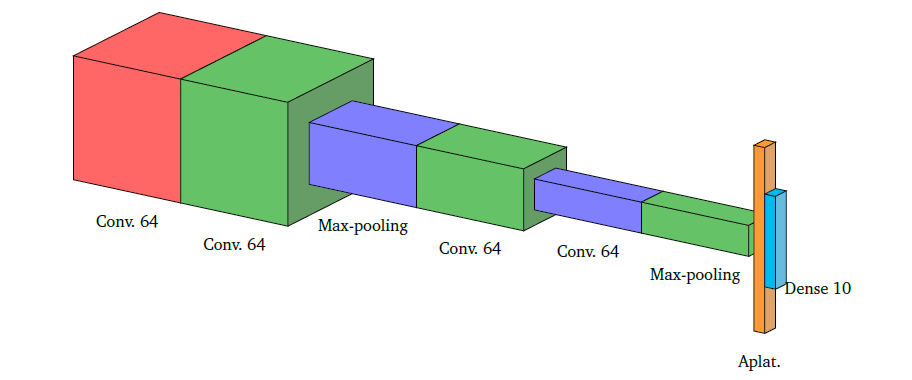

1. il y a en tout 153 546 poids à calculer
2. sans les deux couches de pooling, il y aurait 767 946 poids

## 1. modules à charger

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

## 2. Données

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train_data, Y_train_data), (X_test_data, Y_test_data) = cifar10.load_data()

num_classes = 10
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Y_train = keras.utils.to_categorical(Y_train_data, num_classes)
Y_test = keras.utils.to_categorical(Y_test_data, num_classes)

# X_train = X_train_data.reshape(50000,32*32*3)
# X_test = X_test_data.reshape(10000,32*32*3)
X_train = X_train_data.astype('float32')
X_test = X_test_data.astype('float32')
X_train = X_train/255
X_test = X_test/255

print(X_train.shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)


## 3. Afficher les images

In [ ]:
import matplotlib.pyplot as plt

def affiche_images(debut):
    plt.axis('off')
    for i in range(9):
        plt.subplot(330 + 1 + i)
        print(Y_train_data[i+debut][0])
        plt.title(labels[Y_train_data[i+debut][0]])
        plt.imshow(X_train_data[i], interpolation='nearest')
    plt.tight_layout()
    plt.show()

    return

# affiche_images(0)

## 4. Réseau

In [ ]:
modele = Sequential()

# Première couche de convolution : 64 neurones, convolution 3x3, activation relu
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))

# Deuxième couche de convolution : 64 neurones
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Mise en commun (pooling)
modele.add(MaxPooling2D(pool_size=(2, 2)))

# Troisième couche de convolution : 64 neurones
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Mise en commun (pooling)
modele.add(MaxPooling2D(pool_size=(2, 2)))

# Quatrième couche de convolution : 64 neurones
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Mise en commun (pooling)
# modele.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatissage 
modele.add(Flatten())

# Couche de sortie : 1O neurones
modele.add(Dense(10, activation='softmax'))

# Méthode de gradient
modele.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affiche un résumé
print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          3

## 5. Entrainement du modèle

In [ ]:
modele.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 22s 7ms/step - loss: 1.3358 - accuracy: 0.5233
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8755 - accuracy: 0.6962
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7173 - accuracy: 0.7520
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6136 - accuracy: 0.7877
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5295 - accuracy: 0.8167
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4589 - accuracy: 0.8406
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4024 - accuracy: 0.8573
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3513 - accuracy: 0.8749
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3059 - accuracy: 0.8919
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.26

## 5. Résultats et Visualisation

Test erreur (loss) : 0.9887396693229675
Test précision (accuracy) : 0.7423999905586243
313/313 [==============================] - 1s 2ms/step


<ipython-input-6-1fa86bff381b>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330 + 1 + i)


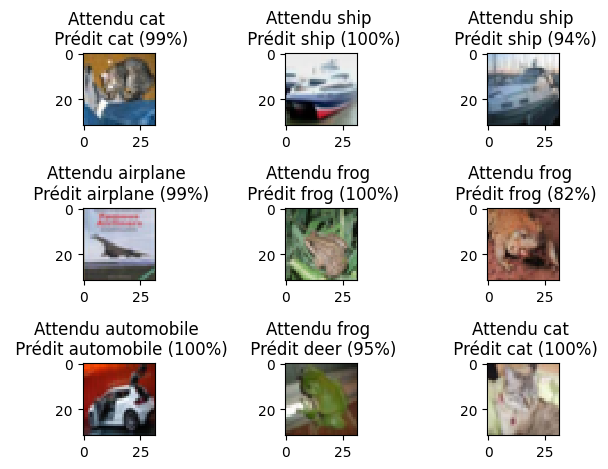

In [ ]:
score = modele.evaluate(X_test, Y_test, verbose=0)
print('Test erreur (loss) :', score[0])
print('Test précision (accuracy) :', score[1])

Y_predict = modele.predict(X_test)

def affiche_images_test(debut):
    plt.axis('off')
    for i in range(9):
        plt.subplot(330 + 1 + i)
        image_predite = Y_predict[i]
        perc_max = int(round(100*np.max(image_predite)))
        rang_max = np.argmax(image_predite)
        titre = 'Attendu ' + labels[Y_test_data[i][0]] + ' \n Prédit ' + labels[rang_max] + ' (' + str(perc_max) + '%)'
        plt.title('Attendu %d - Prédit %d (%d%%)' % (Y_test_data[i],rang_max,perc_max))
        plt.title(titre)
        plt.imshow(X_test_data[i], interpolation='nearest')
    plt.tight_layout()
    # plt.savefig('tfconv-images-test.png')
    plt.show()

    return

affiche_images_test(0)

# 10 époques : accuracy 82% (train) / 73% (test)